# Es_71_1


L'obiettivo principale del primo esericizo dell'esercitazione numero 7 è quello di studiare l'autocorrelazione dei dati per compiere una scelta ottimale per il numero di blocchi del data blocking, utilizzando un approccio Monte Carlo per risolvere lo stesso problema che incontrato nella esercitazione 4 (Dinamica Molecolare). 





Per quanto riguarda la parte di codice C++, abbiamo dovuto modificarne uno esistente per sputare fuori i dati da analizzare in Python e per calcolare la funzione di distribuzione radiale ($g(r)$), che è stata anche implementata nel codice di Molecular Dynamics per confronto.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

def AutoCorrelation(x, tau):
    lenght = len(x)-tau
    x_t=0
    x_tT=0
    x_xT=0
    x_2=0
    for t in range(lenght):
        x_t  += x[t]
        x_tT += x[t+tau]
        x_xT += x[t]*x[t+tau]
        x_2  += x[t]**2
    x_t  = x_t/lenght
    x_tT = x_tT/lenght
    x_xT = x_xT/lenght
    x_2  = x_2/lenght
    return (x_xT-x_t*x_tT)/(x_2-x_t**2)


L=np.array([10, 20, 50, 100, 180, 300, 450, 650, 1250, 2050, 3000, 4000, 5000])

n=200

### Solid

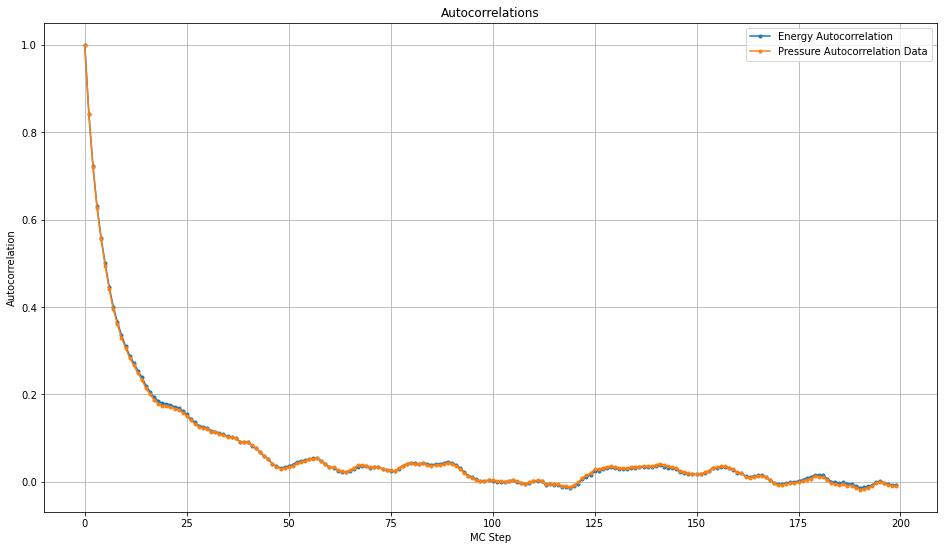

In [2]:
k=np.loadtxt("e_inst_s.dat")

ac=[]

x = np.arange(0,n,1)
for i in range(n):
    ac.append(AutoCorrelation(k,i))
plt.rcParams['figure.figsize'] = [16,9]
plt.plot(x,ac,label="Energy Autocorrelation", marker=".")

k=np.loadtxt("p_inst_s.dat")

ac=[]

x = np.arange(0,n,1)
for i in range(n):
    ac.append(AutoCorrelation(k,i))
plt.plot(x,ac,label="Pressure Autocorrelation Data", marker=".")

plt.legend()
plt.grid(1)
plt.title("Autocorrelations")
plt.xlabel("MC Step")
plt.ylabel("Autocorrelation")
plt.show()

### Liquid

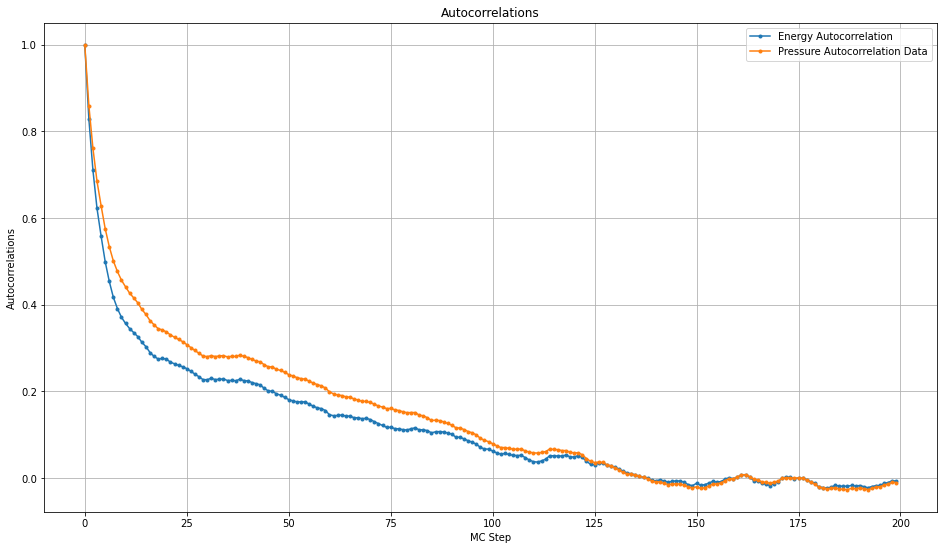

In [3]:
k=np.loadtxt("e_inst_l.dat")

ac=[]

x = np.arange(0,n,1)
for i in range(n):
    ac.append(AutoCorrelation(k,i))
plt.rcParams['figure.figsize'] = [16,9]
plt.plot(x,ac,label="Energy Autocorrelation", marker=".")

k=np.loadtxt("p_inst_l.dat")

ac=[]

x = np.arange(0,n,1)
for i in range(n):
    ac.append(AutoCorrelation(k,i))
plt.plot(x,ac,label="Pressure Autocorrelation Data", marker=".")

plt.legend()
plt.grid(1)
plt.title("Autocorrelations")
plt.xlabel("MC Step")
plt.ylabel("Autocorrelations")
plt.show()

### Gas

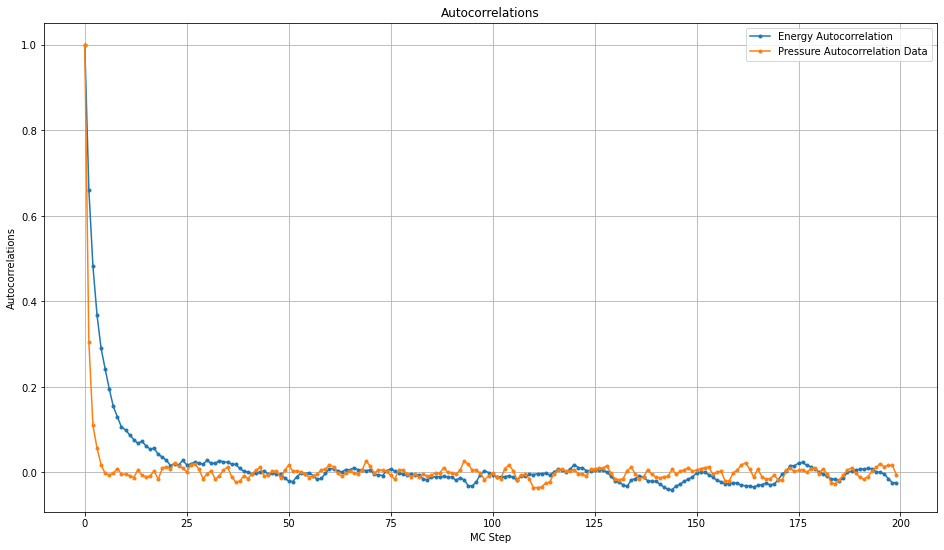

In [4]:
k=np.loadtxt("e_inst_g.dat")

ac=[]

x = np.arange(0,n,1)
for i in range(n):
    ac.append(AutoCorrelation(k,i))
plt.rcParams['figure.figsize'] = [16,9]
plt.plot(x,ac,label="Energy Autocorrelation", marker=".")

k=np.loadtxt("p_inst_g.dat")

ac=[]

x = np.arange(0,n,1)
for i in range(n):
    ac.append(AutoCorrelation(k,i))
plt.plot(x,ac,label="Pressure Autocorrelation Data", marker=".")

plt.legend()
plt.grid(1)
plt.title("Autocorrelations")
plt.xlabel("MC Step")
plt.ylabel("Autocorrelations")
plt.show()

Stima delle incertezze statistiche del valore di aspettazione di $U/N$ e $P$ per diverse dimensioni dei blocchi di data blocking.

### Solid

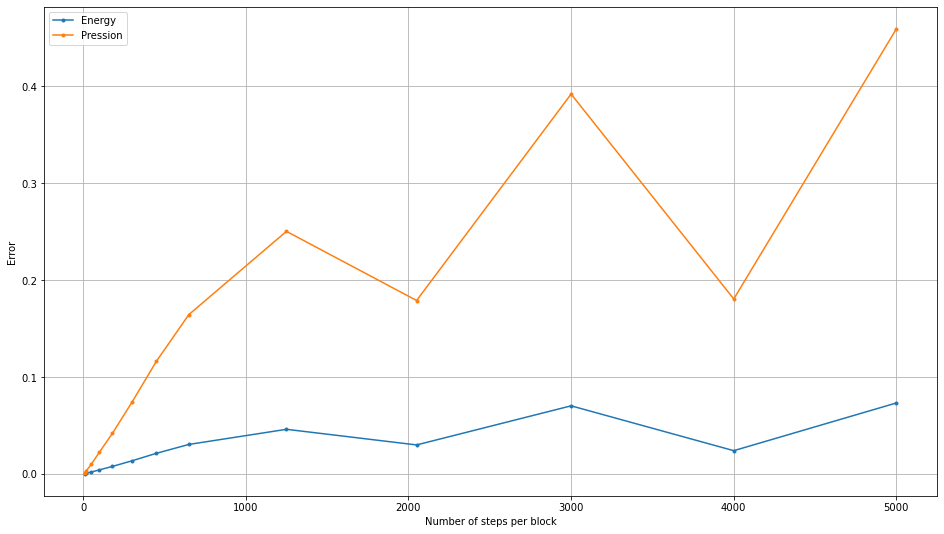

In [5]:
k=np.loadtxt("e_inst_s.dat")
M=len(k)
N = M/L
errors = np.zeros(len(L))
index=0
ind=0
plt.figure(num=None, figsize=(16, 9))
for block_size in L:
        block_number = int(M/block_size)
        ave = np.zeros(block_number)
        error = np.zeros(block_number)
        for iblock in range(block_number):
            for istep in range(block_size):
                ave[iblock]+=k[iblock*block_size+istep]
            ave[iblock]/=block_number
        for i in range(block_number):
            global_ave = 0.
            global_ave_2 = 0.
            for j in range(i+1):
                global_ave += ave[j]
                global_ave_2 += ave[j]**2
            global_ave /=(i+1)
            global_ave_2 /=(i+1)
            error = ((global_ave_2-global_ave**2))**0.5
            errors[ind]=error/np.sqrt(block_size)
        ind+=1

plt.plot(L,errors, marker='.',label="Energy")

k=np.loadtxt("p_inst_s.dat")
M=len(k)
N = M/L
errors = np.zeros(len(L))
index=0
ind=0
for block_size in L:
        block_number = int(M/block_size)
        ave = np.zeros(block_number)
        error = np.zeros(block_number)
        for iblock in range(block_number):
            for istep in range(block_size):
                ave[iblock]+=k[iblock*block_size+istep]
            ave[iblock]/=block_number
        for i in range(block_number):
            global_ave = 0.
            global_ave_2 = 0.
            for j in range(i+1):
                global_ave += ave[j]
                global_ave_2 += ave[j]**2
            global_ave /=(i+1)
            global_ave_2 /=(i+1)
            error = ((global_ave_2-global_ave**2))**0.5
            errors[ind]=error/np.sqrt(block_size)
        ind+=1


plt.plot(L,errors, marker='.',label="Pression")
plt.grid(1)
plt.legend()
plt.xlabel("Number of steps per block")
plt.ylabel("Error")
plt.show()

### Liquid

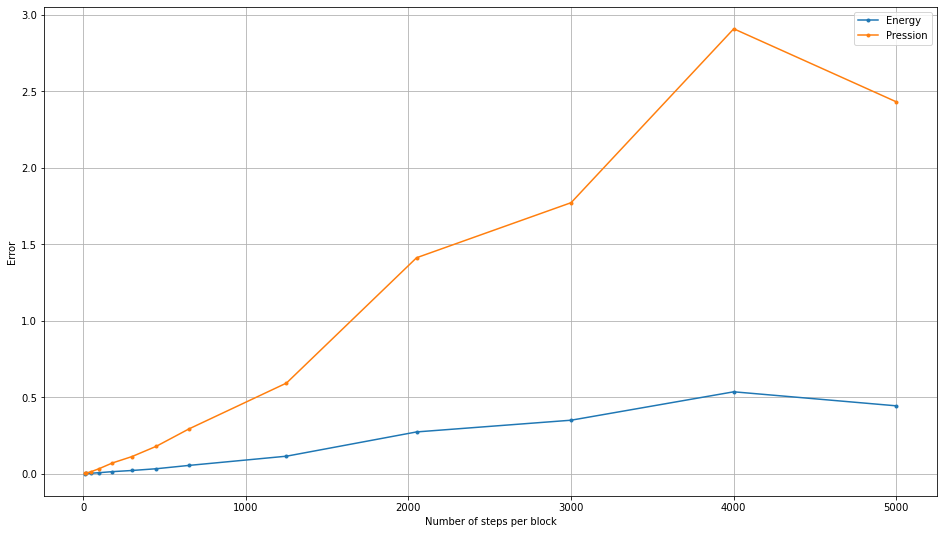

In [6]:
k=np.loadtxt("e_inst_l.dat")
M=len(k)
N = M/L
errors = np.zeros(len(L))
index=0
ind=0
plt.figure(num=None, figsize=(16, 9))
for block_size in L:
        block_number = int(M/block_size)
        ave = np.zeros(block_number)
        error = np.zeros(block_number)
        for iblock in range(block_number):
            for istep in range(block_size):
                ave[iblock]+=k[iblock*block_size+istep]
            ave[iblock]/=block_number
        for i in range(block_number):
            global_ave = 0.
            global_ave_2 = 0.
            for j in range(i+1):
                global_ave += ave[j]
                global_ave_2 += ave[j]**2
            global_ave /=(i+1)
            global_ave_2 /=(i+1)
            error = ((global_ave_2-global_ave**2))**0.5
            errors[ind]=error/np.sqrt(block_size)
        ind+=1

plt.plot(L,errors, marker='.',label="Energy")

k=np.loadtxt("p_inst_l.dat")
M=len(k)
N = M/L
errors = np.zeros(len(L))
index=0
ind=0
for block_size in L:
        block_number = int(M/block_size)
        ave = np.zeros(block_number)
        error = np.zeros(block_number)
        for iblock in range(block_number):
            for istep in range(block_size):
                ave[iblock]+=k[iblock*block_size+istep]
            ave[iblock]/=block_number
        for i in range(block_number):
            global_ave = 0.
            global_ave_2 = 0.
            for j in range(i+1):
                global_ave += ave[j]
                global_ave_2 += ave[j]**2
            global_ave /=(i+1)
            global_ave_2 /=(i+1)
            error = ((global_ave_2-global_ave**2))**0.5
            errors[ind]=error/np.sqrt(block_size)
        ind+=1


plt.plot(L,errors, marker='.',label="Pression")
plt.grid(1)
plt.legend()
plt.xlabel("Number of steps per block")
plt.ylabel("Error")
plt.show()

### Gas

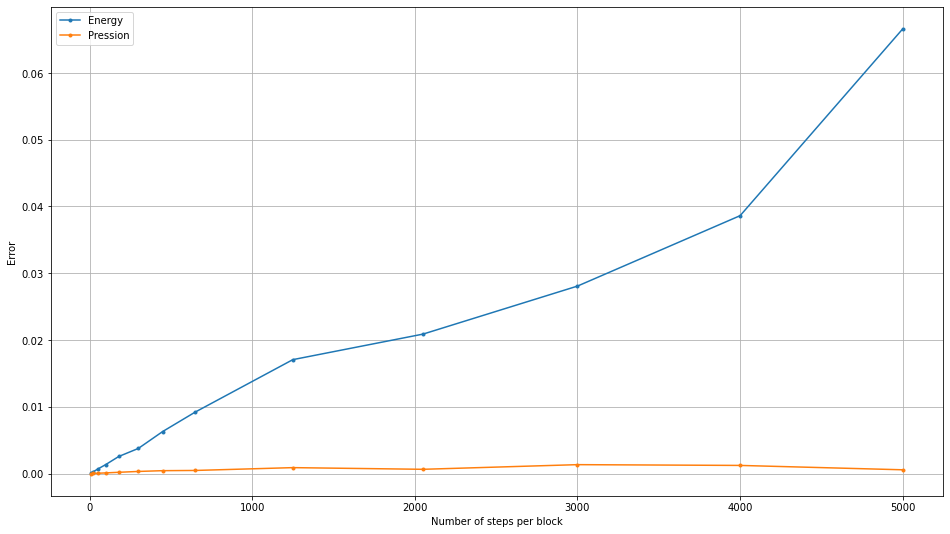

In [7]:
k=np.loadtxt("e_inst_g.dat")
M=len(k)
N = M/L
errors = np.zeros(len(L))
index=0
ind=0
plt.figure(num=None, figsize=(16, 9))
for block_size in L:
        block_number = int(M/block_size)
        ave = np.zeros(block_number)
        error = np.zeros(block_number)
        for iblock in range(block_number):
            for istep in range(block_size):
                ave[iblock]+=k[iblock*block_size+istep]
            ave[iblock]/=block_number
        for i in range(block_number):
            global_ave = 0.
            global_ave_2 = 0.
            for j in range(i+1):
                global_ave += ave[j]
                global_ave_2 += ave[j]**2
            global_ave /=(i+1)
            global_ave_2 /=(i+1)
            error = ((global_ave_2-global_ave**2))**0.5
            errors[ind]=error/np.sqrt(block_size)
        ind+=1

plt.plot(L,errors, marker='.',label="Energy")

k=np.loadtxt("p_inst_g.dat")
M=len(k)
N = M/L
errors = np.zeros(len(L))
index=0
ind=0
for block_size in L:
        block_number = int(M/block_size)
        ave = np.zeros(block_number)
        error = np.zeros(block_number)
        for iblock in range(block_number):
            for istep in range(block_size):
                ave[iblock]+=k[iblock*block_size+istep]
            ave[iblock]/=block_number
        for i in range(block_number):
            global_ave = 0.
            global_ave_2 = 0.
            for j in range(i+1):
                global_ave += ave[j]
                global_ave_2 += ave[j]**2
            global_ave /=(i+1)
            global_ave_2 /=(i+1)
            error = ((global_ave_2-global_ave**2))**0.5
            errors[ind]=error/np.sqrt(block_size)
        ind+=1


plt.plot(L,errors, marker='.',label="Pression")
plt.grid(1)
plt.legend()
plt.xlabel("Number of steps per block")
plt.ylabel("Error")
plt.show()

# Es_74_1


L'ultimo esercizio dell'esercitazione numero 7 è volto a mettere a confronto due modi per fare simulazioni: la Dinamica Molecolare e il Monte Carlo. 
Qui sotto sono mostrati grafici in cui è stata confrontata la funzione di distribuzione radiale ottenuta attraverso questi due approcci. I risultati mostrano che entrambe le simulazioni, fatte per i tre stati della materia, per l'Argon, mostrano tendenze simili. Mostriamo anche i valori di U/N e pressione, calcolati con il DataBlocking per la simulazione Monte Carlo. <br>
Tutti i valori sono stati poi convertiti in unità fisiche ([eV] per le energie e [atm] per le pressioni).

### Solid

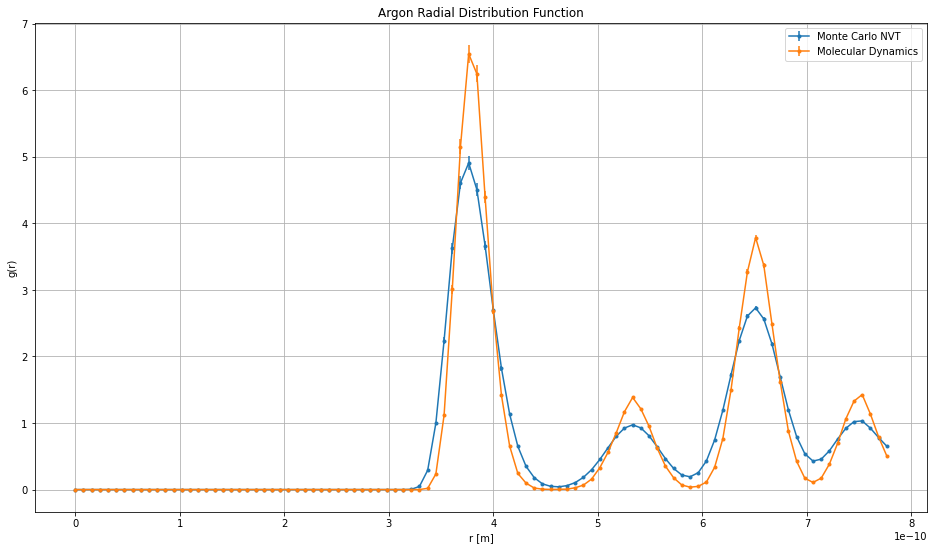

In [8]:
k_b = 8.61*10**-5
k_bj = 1.38*10**-23
sigma=0.34*10**-9
epsilon=120*k_b
t=120
p = t*k_bj*10**-5/(sigma**3)

k=np.loadtxt("output.gave.0s")

x=k[:,0]*sigma
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".", label="Monte Carlo NVT")

k=np.loadtxt("MD_NVE/output.gave.0s")
x=k[:,0]*sigma
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".", label="Molecular Dynamics")
plt.title("Argon Radial Distribution Function")
plt.xlabel("r [m]")
plt.ylabel("g(r)")
plt.legend()
plt.grid()
plt.show()

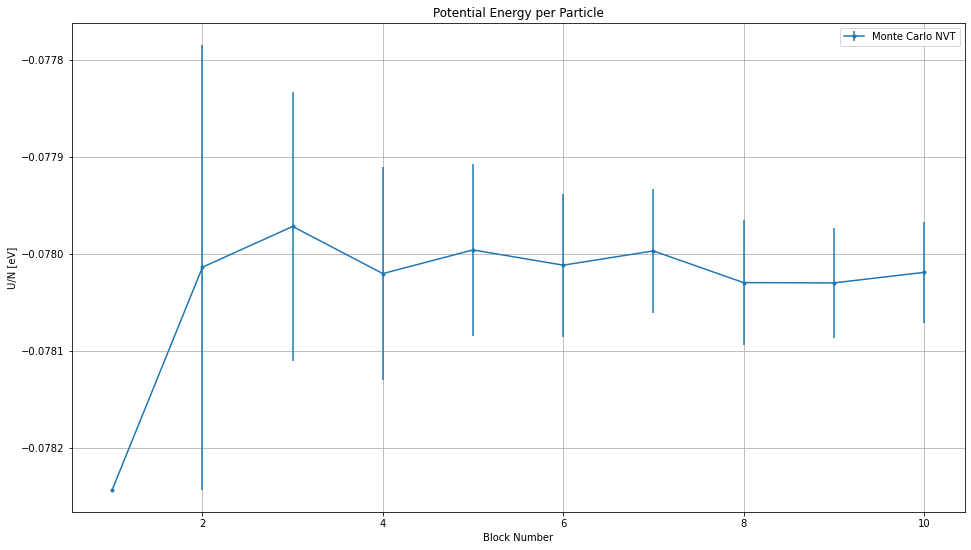

In [9]:
k=np.loadtxt("output.epot.0s")
x=k[:,0]
y=k[:,2]*epsilon
err=k[:,3]*epsilon

plt.errorbar(x,y,yerr=err, label="Monte Carlo NVT", marker=".")
plt.title("Potential Energy per Particle")
plt.xlabel("Block Number")
plt.ylabel("U/N [eV]")
plt.grid()
plt.legend()
plt.show()

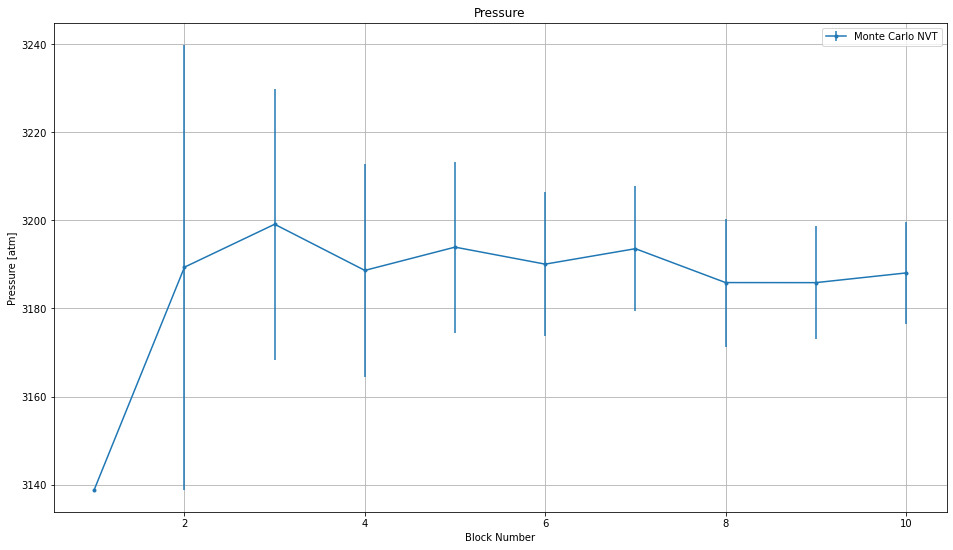

In [10]:
k=np.loadtxt("output.pres.0s")
x=k[:,0]
y=k[:,2]*p
err=k[:,3]*p

plt.errorbar(x,y,yerr=err, label="Monte Carlo NVT", marker=".")
plt.title("Pressure")
plt.xlabel("Block Number")
plt.ylabel("Pressure [atm]")
plt.grid()
plt.legend()
plt.show()

### Liquid

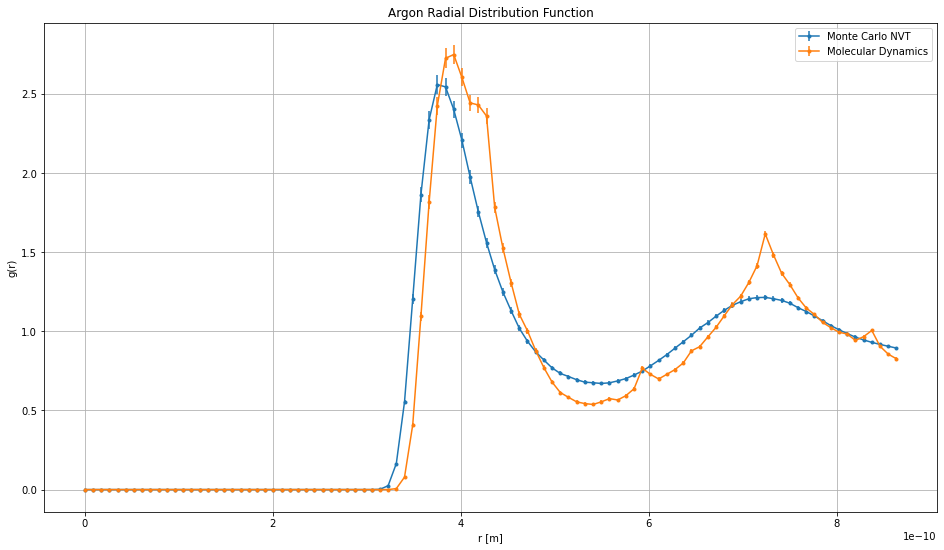

In [11]:
k=np.loadtxt("output.gave.0l")

x=k[:,0]*sigma
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".", label="Monte Carlo NVT")

k=np.loadtxt("MD_NVE/output.gave.0l")
x=k[:,0]*sigma
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".", label="Molecular Dynamics")
plt.title("Argon Radial Distribution Function")
plt.xlabel("r [m]")
plt.ylabel("g(r)")
plt.legend()
plt.grid()
plt.show()

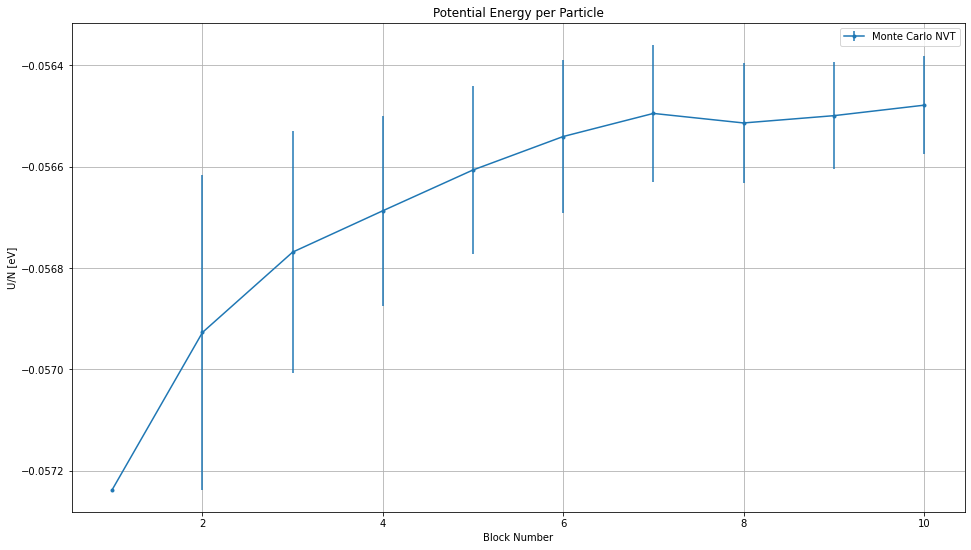

In [12]:
k=np.loadtxt("output.epot.0l")
x=k[:,0]
y=k[:,2]*epsilon
err=k[:,3]*epsilon

plt.errorbar(x,y,yerr=err, label="Monte Carlo NVT", marker=".")
plt.title("Potential Energy per Particle")
plt.xlabel("Block Number")
plt.ylabel("U/N [eV]")
plt.grid()
plt.legend()
plt.show()

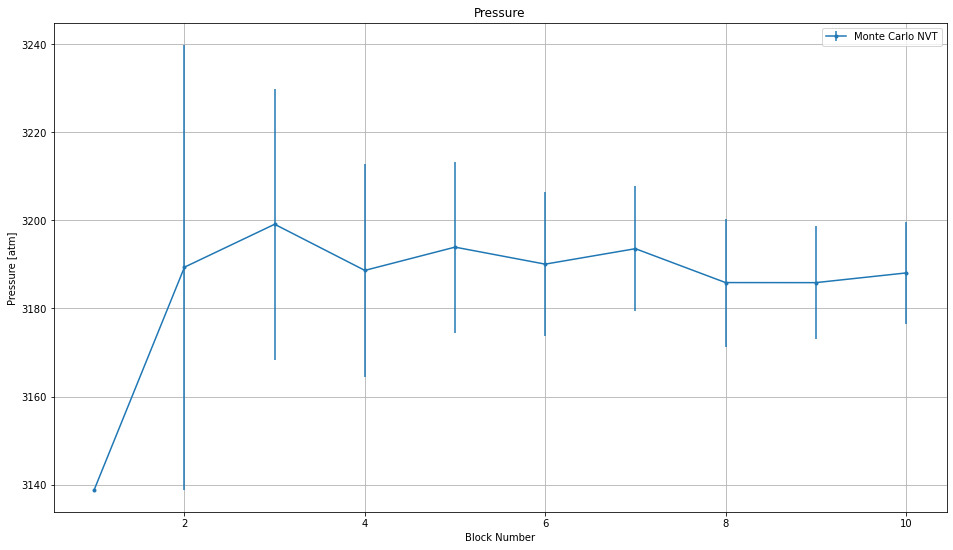

In [13]:
k=np.loadtxt("output.pres.0s")

x=k[:,0]
y=k[:,2]*p
err=k[:,3]*p

plt.errorbar(x,y,yerr=err, label="Monte Carlo NVT", marker=".")
plt.title("Pressure")
plt.xlabel("Block Number")
plt.ylabel("Pressure [atm]")
plt.grid()
plt.legend()
plt.show()

### Gas

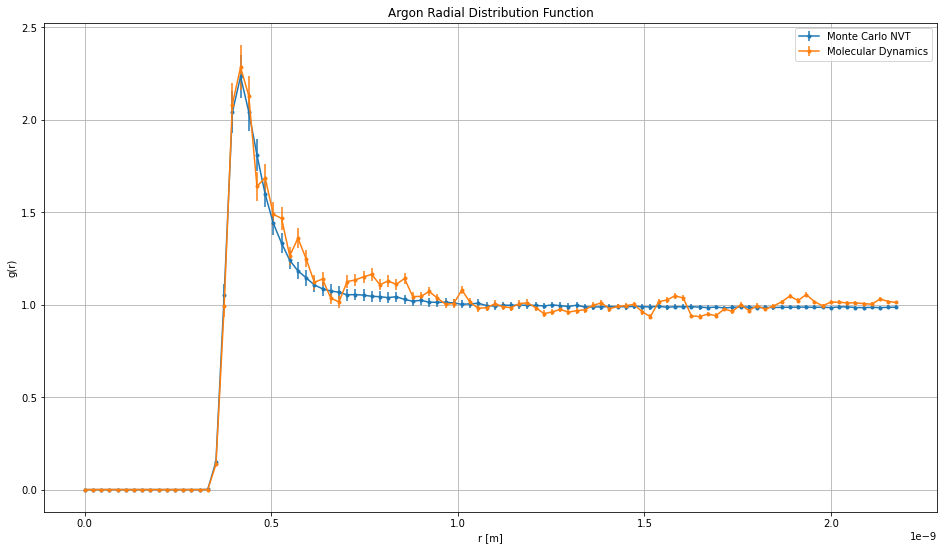

In [14]:
k=np.loadtxt("output.gave.0g")

x=k[:,0]*sigma
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".", label="Monte Carlo NVT")

k=np.loadtxt("MD_NVE/output.gave.0g")
x=k[:,0]*sigma
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".", label="Molecular Dynamics")
plt.title("Argon Radial Distribution Function")
plt.xlabel("r [m]")
plt.ylabel("g(r)")
plt.legend()
plt.grid()
plt.show()

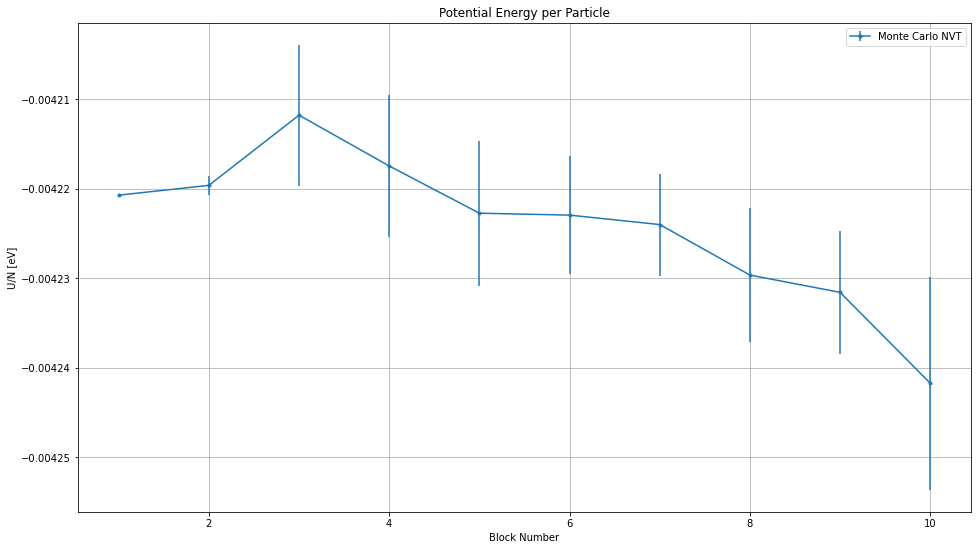

In [15]:
k=np.loadtxt("output.epot.0g")
x=k[:,0]
y=k[:,2]*epsilon
err=k[:,3]*epsilon

plt.errorbar(x,y,yerr=err, label="Monte Carlo NVT", marker=".")
plt.title("Potential Energy per Particle")
plt.xlabel("Block Number")
plt.ylabel("U/N [eV]")
plt.grid()
plt.legend()
plt.show()

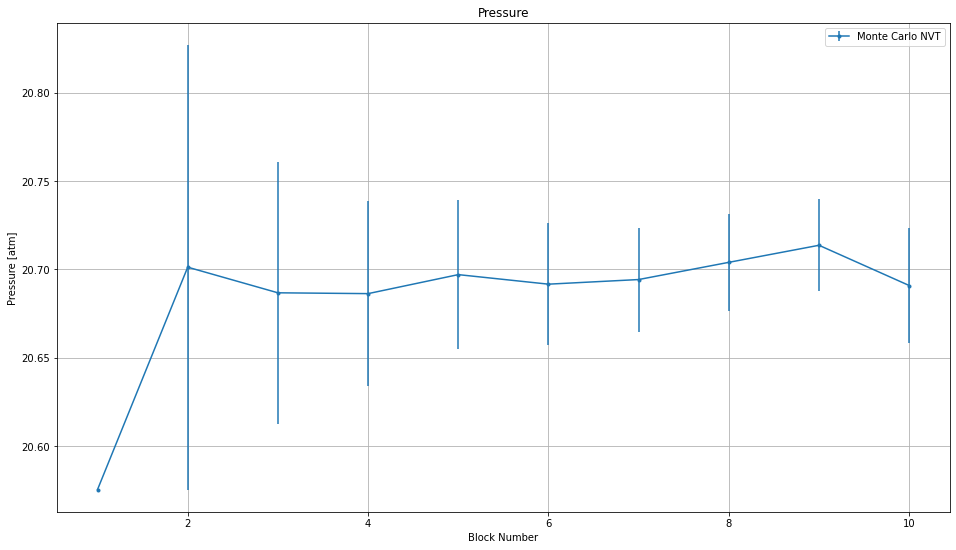

In [16]:
k=np.loadtxt("output.pres.0g")

x=k[:,0]
y=k[:,2]*p
err=k[:,3]*p

plt.errorbar(x,y,yerr=err, label="Monte Carlo NVT", marker=".")
plt.title("Pressure")
plt.xlabel("Block Number")
plt.ylabel("Pressure [atm]")
plt.grid()
plt.legend()
plt.show()